In [110]:
import pandas as pd
import os.path as path
import os
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
data_path = "../data/"
train_dirname = "DAM"
csv_filename = "product_list.csv"

def load_csv_to_dataframe():
    csv_path = path.join(data_path, csv_filename)
    return pd.read_csv(csv_path)

infos = load_csv_to_dataframe()
infos.rename(columns={"MMC": "article_id", "Product_BusinessUnitDesc" : "classe"}, inplace=True)

classes = infos["classe"].unique()
print("classes : ",classes)
print(infos.columns)    
print("\nCOUNT:")
print(infos.groupby("classe").count())


classes :  ['W RTW' 'W SLG' 'W Bags' 'W Shoes' 'Watches' 'W Accessories']
Index(['article_id', 'classe'], dtype='object')

COUNT:
               article_id
classe                   
W Accessories         543
W Bags                830
W RTW                 627
W SLG                 302
W Shoes               336
Watches               129


In [112]:
def get_all_sous_classes(infos,classe):
    return list(infos[infos.classe==classe]["sous_classe"].unique())

def get_random_class(infos,classe):
    return rd.choice(get_all_sous_classes(infos,classe)) 

def get_class_list(infos,classe,sous_classe):
    df = infos[infos.classe==classe]
    return df[df["sous_classe"] == sous_classe]["article_id"].tolist()

In [113]:
def sous_class_from_subnam(df,classe,a,b):
    #df[df["classe"] == classe]["sous_classe"] = df[df["classe"] == classe]["article_id"].apply(lambda x: x[a:b])
    df.loc[df["classe"] == classe, "sous_classe"] = df.loc[df["classe"] == classe, "article_id"].apply(lambda x: x[a:b])
    # return df
    
infos["sous_classe"] = None

sous_class_from_subnam(infos,"W RTW",3,6) # good
sous_class_from_subnam(infos,"W SLG",0,5) # good
sous_class_from_subnam(infos,"W Bags",0,5) # good
sous_class_from_subnam(infos,"W Shoes",0,3) # pas trop mal
sous_class_from_subnam(infos,"Watches",0,5) # good
sous_class_from_subnam(infos,"W Accessories",5,5+3)

infos.sample(10)



,article_id,classe,sous_classe
375,211R35A1166X4150,W RTW,R35
1634,M566SPAUGXM21Y,W Bags,M566S
329,151J62A1166X9000,W RTW,J62
529,257V34A1258X9330,W RTW,V34
1577,M565SJAWAXM41G,W Bags,M565S
1438,M500SJAAUXM01B,W Bags,M500S
2034,KDI611SCNS52X,W Shoes,KDI
616,951V46A1202X5825,W RTW,V46
2298,15MON106I601C420,W Accessories,106
331,151M50A7608X2817,W RTW,M50


In [123]:
print(infos.groupby("classe")["sous_classe"].nunique())
print("total classes", infos.groupby("classe")["sous_classe"].nunique().sum())

classe
W Accessories    189
W Bags            76
W RTW            366
W SLG            123
W Shoes           14
Watches           28
Name: sous_classe, dtype: int64
total classes 796


In [115]:


classe = rd.sample(list(classes),1)[0]
sous_classe = get_random_class(infos,classe)
print(classe,sous_classe)
print(get_class_list(infos,classe,sous_classe))

Watches CD181
['CD18111X10080000', 'CD18115X10770000', 'CD18117X10040000', 'CD18117X10050000', 'CD18117X10700000']


Text(0.5, 1.0, "Repartition du nombre d'image par sous classe")

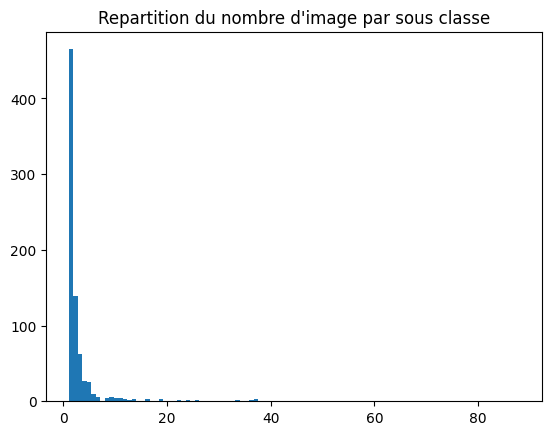

In [127]:
#repartition
l = {}
for classe in list(classes):
    for sous_classe in get_all_sous_classes(infos,classe):
        l[classe+"_"+sous_classe] = len(get_class_list(infos,classe,sous_classe))
plt.hist(l.values(),bins=100)
for key in l.keys():
    if l[key]>=100:
        print(key,l[key])
plt.title("Repartition du nombre d'image par sous classe")

classe :  W RTW
sous_classe :  D02
Nombre d'images : 1


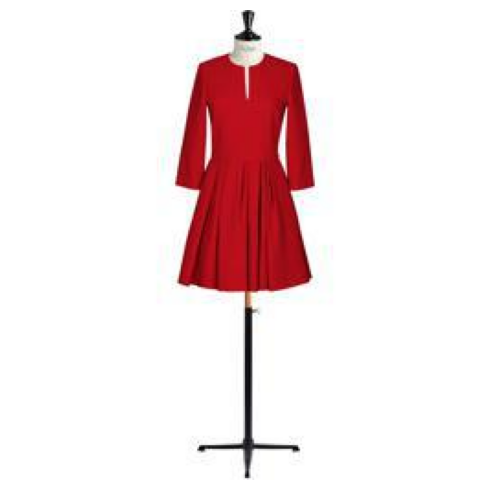

In [116]:
import matplotlib.image as mpimg
import numpy as np
from process_new_classes.plot_classes import show_group


# ['W RTW' 'W SLG' 'W Bags' 'W Shoes' 'Watches' 'W Accessories']


# classe = rd.sample(list(classes),1)[0]
classe = 'W RTW'
sous_classe = get_random_class(infos,classe)
images_filenames = get_class_list(infos,classe,sous_classe)

# Lire toutes les images d'un dossier
image_filepaths = [path.join(data_path, train_dirname, filename+".jpeg") for filename in images_filenames]

print("classe : ",classe)
print("sous_classe : ",sous_classe)
show_group(image_filepaths)

Nombre d'images : 80


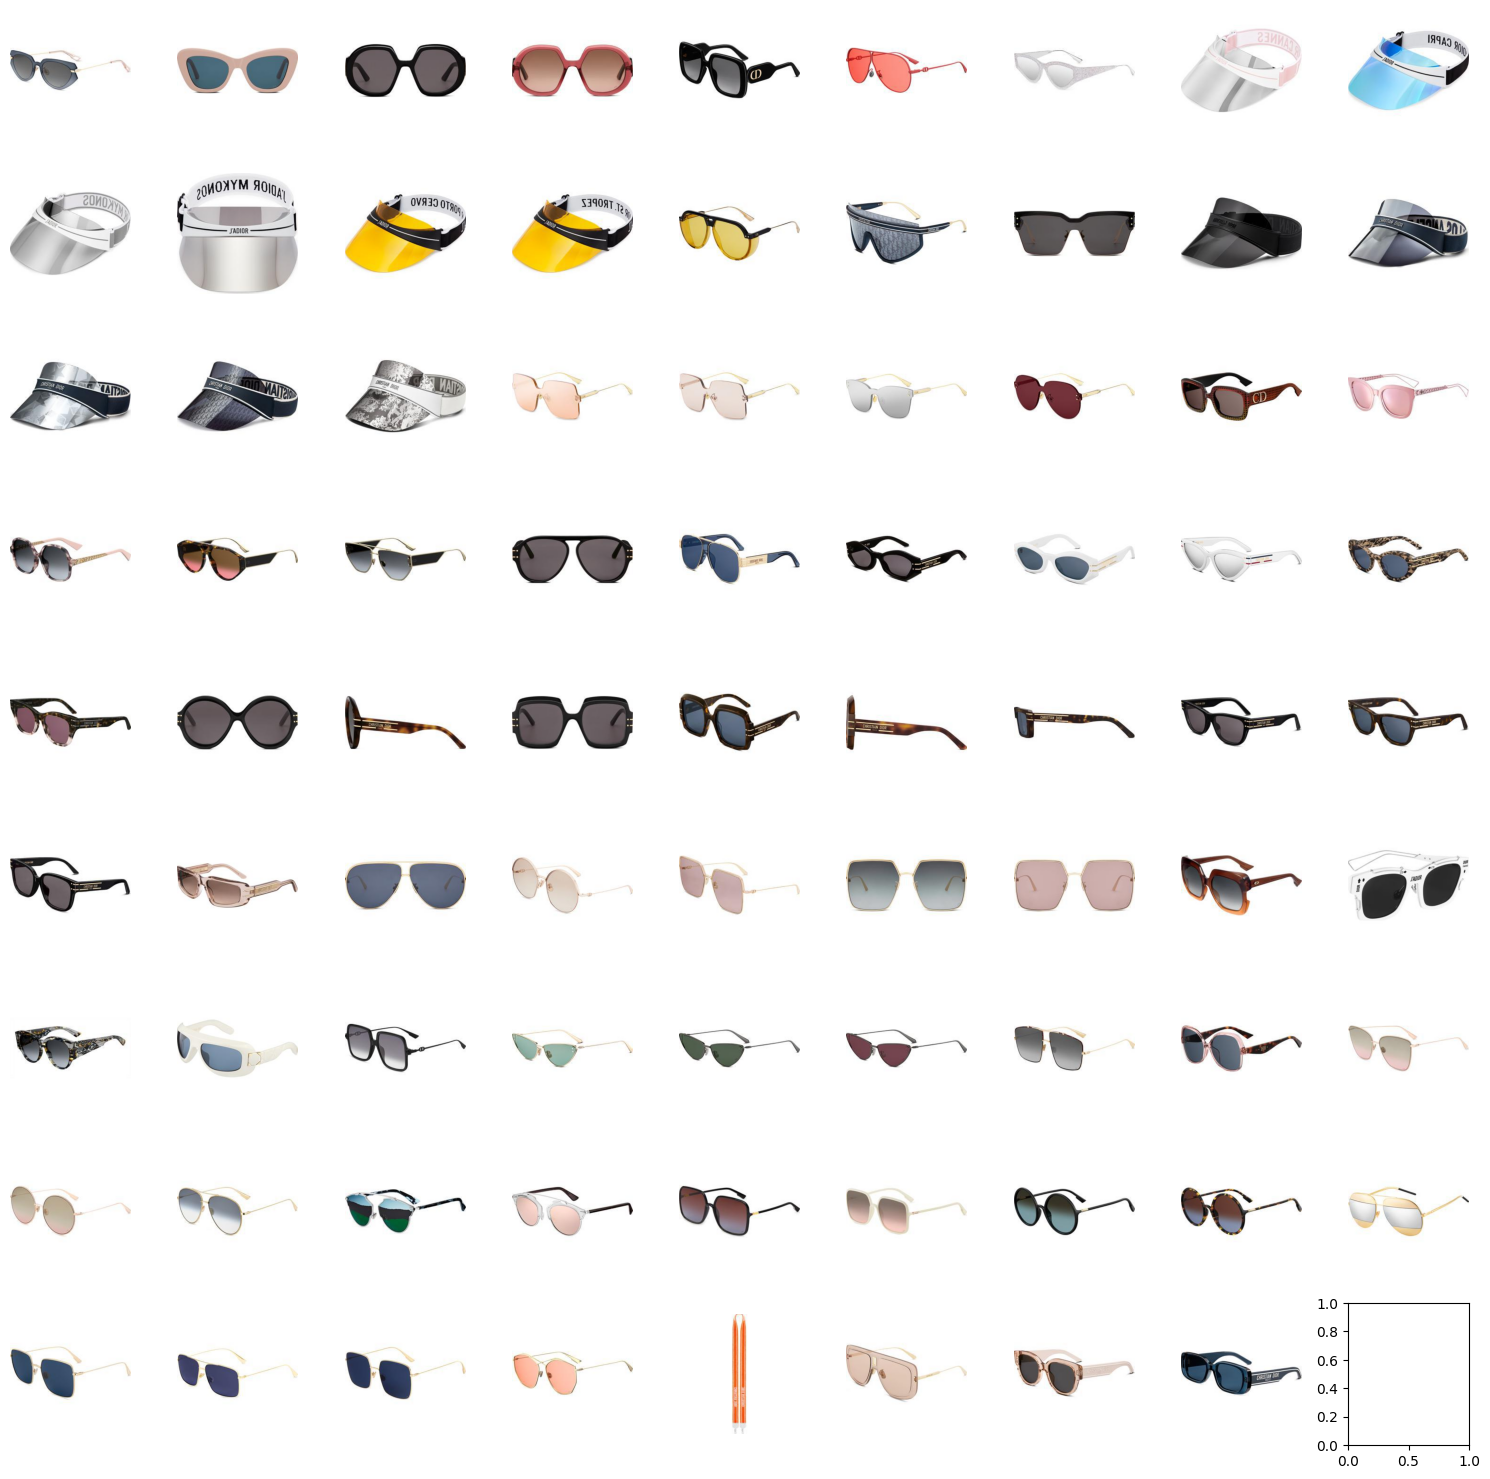

ATTITUDE22M01I
BOBYB1UXR40C0
BOBYR1UXR10A0
BOBYR1UXR42FR
BOBYS2UXR10A1
CAMP0Z3ZK
CATSTYLE1SHKN0T
CLUB1CANR1611
CLUB1CPRG0Y07
CLUB1MKS15712
CLUB1MKSECG06
CLUB1PCVOTL00
CLUB1STZOTL00
CLUB371CHO
CLUBM2UXT31B8
CLUBM4UWR45A0
CLUBV1UXR11A0
CLUBV1UXRBLB0
CLUBV1UXT31B7
CLUBV1UXT31B8
CLUBV1UXT96A8
COLORQ1DDBSQ
COLORQ1FWMVC
COLORQ2YB7T4
COLORQ3LHFU1
DDIORCDCB2M
DIORAMA1TGW0J
DIORAMA8F0T41I
DIORCLAN108686
DIORCLAN2J5G1I
DSGTA1UXR10A0
DSGTA3UXRB0B0
DSGTB1UXR10A0
DSGTB1UXR50B0
DSGTB2UZRF0A4
DSGTB3UTR69B0
DSGTB4IXR25D0
DSGTR1UXR10A0
DSGTR1UXR26A1
DSGTS1UXR10A0
DSGTS1UXR20B0
DSGTS1UXR26A1
DSGTS2UXR20B0
DSGTS6UXR10A0
DSGTS6UXR20B0
DSGTS7FXR10A0
DSGTS9UXR40F1
EVDRAUQRB0B0
EVDRR1UQRD0F1
EVDRS1UQRB0G0
EVDRSUQRB0A1
EVDRSUQRB0G0
GAIA12J9O
JADIORKY2A9
LADYDIORS2ACI1I
LADYM1IXR95B0
LINK18079O
MISDB1UXRB0O0
MISDB1UXRH4C0
MISDB1UXRH4D0
MONSIEUR2XWY1I
NUANCEF35JKU
SOCIETY1DDB86
SOCIETY2FDDB86
SOCIETY3J5G9O
SOREALA3YG9P
SOREALUGKZ0J
SOSTELAIR1807YB
SOSTELAIR1SZJ86
SOSTELAIR38071I
SOSTELAIR3EPZYB
SPLIT1000DC
STEL

In [104]:

import re
# Définir le motif regex
pattern1 = re.compile(r'[A-Z]{3,10}[0-9][A-Z0-9]+$')
pattern2 = re.compile(r'[0-9]{2}[A-Z]{3}[0-9]{3}[A-Z0-9]$')

# 94RAY106IFDMC512 ,W Accessories
# 94RAY106IMYKC312 ,W Accessories
# 94RAY106IMYKC612 ,W Accessories
# 94ROY106I602C615 ,W Accessories
# 94TOJ106I600C312 ,W Accessories
# 94TOJ331I904C312 ,W Accessories
# 94TOJ923I130C512 ,W Accessories
# 95DAM055I904C906 ,W Accessories
# 95ESC090I603C304 ,W Accessories
# 95JAD318I176C027 ,W Accessories

# image_filenames = infos[(infos["classe"] == "W Accessories") & (infos["article_id"].str.contains("TOJ"))]["article_id"].tolist()
# image_filenames = infos[(infos["classe"] == "W Accessories") & (infos["article_id"].str[2:3]=="D")]["article_id"].tolist()
# image_filenames = infos[(infos["classe"] == "W Accessories") & (infos["article_id"].str.startswith("11"))]["article_id"].tolist()
image_filenames = infos[(infos["classe"] == "W Accessories") & (infos["article_id"].str.match(pattern1))]["article_id"].tolist()


image_filepaths = [path.join(data_path, train_dirname, filename+".jpeg") for filename in image_filenames]
show_group(image_filepaths)
for aba in image_filenames:
    print(aba)
print("\n")

In [125]:

    
# print(infos.columns)


def save_df(infos:pd.DataFrame):
    num_sous_classes = infos.groupby(["classe"])["sous_classe"].nunique().sum()
    print(num_sous_classes)
    print(infos.columns)
    
    df_tosave = infos.copy()

    dict_classes = {}
    i = 1
    for classe in list(classes):
        for sous_classe in get_all_sous_classes(df_tosave,classe):
            dict_classes[classe+"_"+sous_classe] = i
            i+=1
    df_tosave["new_classe"] = df_tosave.apply(lambda x: dict_classes[x["classe"]+"_"+x["sous_classe"]],axis=1)
    df_tosave.rename(columns={"classe": "categorie","new_classe":"classe"}, inplace=True)
    df_tosave[["article_id","categorie","classe"]].to_csv(f"product_list_with_new_classe(n={num_sous_classes}).csv",index=False)
    
save_df(infos)



796
Index(['article_id', 'classe', 'sous_classe'], dtype='object')
